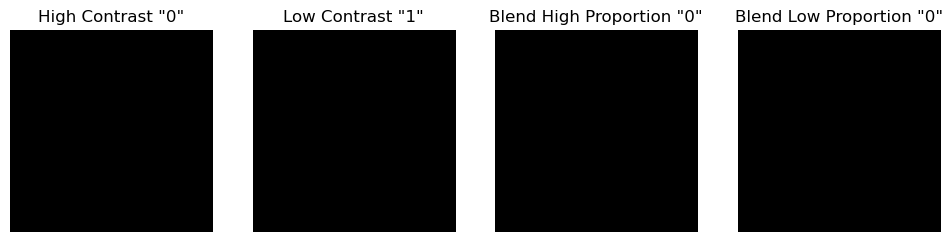

In [1]:
import torch
import matplotlib.pyplot as plt

# Create simple grayscale images for demonstration
image1 = torch.full((28, 28), 0.5)  # Uniform gray image for digit '0'
image2 = torch.full((28, 28), 0.3)  # Darker gray image for digit '1'

# Apply high contrast to image1
mean_intensity1 = image1.mean()
high_contrast_image1 = (image1 - mean_intensity1) * 2.0 + mean_intensity1

# Apply low contrast to image2
mean_intensity2 = image2.mean()
low_contrast_image2 = (image2 - mean_intensity2) * 0.5 + mean_intensity2

# Blend images with different proportions
blended_high_proportion = high_contrast_image1 * 0.7 + low_contrast_image2 * 0.3
blended_low_proportion = high_contrast_image1 * 0.3 + low_contrast_image2 * 0.7

# Plotting
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].imshow(high_contrast_image1, cmap='gray')
ax[0].set_title('High Contrast "0"')
ax[0].axis('off')

ax[1].imshow(low_contrast_image2, cmap='gray')
ax[1].set_title('Low Contrast "1"')
ax[1].axis('off')

ax[2].imshow(blended_high_proportion, cmap='gray')
ax[2].set_title('Blend High Proportion "0"')
ax[2].axis('off')

ax[3].imshow(blended_low_proportion, cmap='gray')
ax[3].set_title('Blend Low Proportion "0"')
ax[3].axis('off')

plt.show()


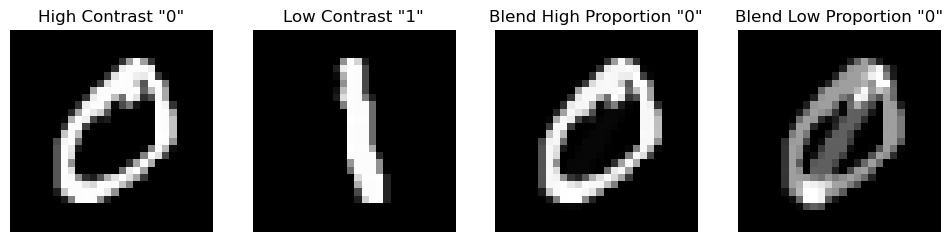

In [14]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Loading MNIST dataset
mnist = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Function to extract specific digit images
def get_digit_images(digit, count):
    images = []
    for image, label in mnist:
        if label == digit and len(images) < count:
            images.append(image)
    return torch.stack(images)

# Extract images for digits '0' and '1'
images_0 = get_digit_images(0, 5)  # Extract 5 images of digit '0'
images_1 = get_digit_images(1, 5)  # Extract 5 images of digit '1'

# Apply contrast
def apply_contrast(images, contrast):
    mean_intensity = images.mean(dim=(2, 3), keepdim=True)
    adjusted_images = (images - mean_intensity) * contrast + mean_intensity
    return adjusted_images

# Adjusted contrast images
high_contrast_images_0 = apply_contrast(images_0, 3.0)
low_contrast_images_1 = apply_contrast(images_1, 0.2)

# Blending images with different proportions
def blend_images(image_set1, image_set2, proportion1, proportion2):
    return image_set1 * proportion1 + image_set2 * proportion2

# Blend two example images with high proportion of '0'
blended_high_0 = blend_images(high_contrast_images_0[0], low_contrast_images_1[0], 0.7, 0.3)
blended_low_0 = blend_images(high_contrast_images_0[0], low_contrast_images_1[0], 0.1, 0.9)

# Visualizing the results
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].imshow(high_contrast_images_0[0].squeeze(), cmap='gray')
ax[0].set_title('High Contrast "0"')
ax[0].axis('off')

ax[1].imshow(low_contrast_images_1[1].squeeze(), cmap='gray')
ax[1].set_title('Low Contrast "1"')
ax[1].axis('off')

ax[2].imshow(blended_high_0.squeeze(), cmap='gray')
ax[2].set_title('Blend High Proportion "0"')
ax[2].axis('off')

ax[3].imshow(blended_low_0.squeeze(), cmap='gray')
ax[3].set_title('Blend Low Proportion "0"')
ax[3].axis('off')

plt.show()


Calculate the similarity by MSE

In [6]:
import torch
from torchvision import datasets, transforms
import numpy as np

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to compute the average image for each digit
def compute_average_images(dataset):
    averages = [torch.zeros((1, 28, 28)) for _ in range(10)]
    counts = [0] * 10
    for image, label in dataset:
        averages[label] += image
        counts[label] += 1
    for i in range(10):
        averages[i] /= counts[i]
    return averages

# Calculate MSE between two images
def mse(image1, image2):
    return ((image1 - image2) ** 2).mean().item()

# Compute average images
average_images = compute_average_images(mnist)

# Compute MSE between each pair of average images
min_mse = float('inf')
max_mse = 0
min_pair = (0, 0)
max_pair = (0, 0)

for i in range(10):
    for j in range(i + 1, 10):
        current_distance = mse(average_images[i], average_images[j])
        print(f"Distance between {i} and {j}: {current_distance}")
        if current_distance < min_distance:
            min_distance = current_distance
            min_pair = (i, j)
        if current_distance > max_distance:
            max_distance = current_distance
            max_pair = (i, j)


print(f"Most similar digits: {min_pair} with MSE = {min_mse}")
print(f"Least similar digits: {max_pair} with MSE = {max_mse}")


Distance between 0 and 1: 0.07294538617134094
Distance between 0 and 2: 0.04035764932632446
Distance between 0 and 3: 0.039838988333940506
Distance between 0 and 4: 0.04972553253173828
Distance between 0 and 5: 0.026214970275759697
Distance between 0 and 6: 0.04121798276901245
Distance between 0 and 7: 0.051431771367788315
Distance between 0 and 8: 0.040189508348703384
Distance between 0 and 9: 0.04867563769221306
Distance between 1 and 2: 0.03272251784801483
Distance between 1 and 3: 0.03359844908118248
Distance between 1 and 4: 0.040871646255254745
Distance between 1 and 5: 0.0297793447971344
Distance between 1 and 6: 0.04117366299033165
Distance between 1 and 7: 0.03677733242511749
Distance between 1 and 8: 0.028929702937602997
Distance between 1 and 9: 0.036005668342113495
Distance between 2 and 3: 0.024614840745925903
Distance between 2 and 4: 0.028578313067555428
Distance between 2 and 5: 0.02612849697470665
Distance between 2 and 6: 0.01990753784775734
Distance between 2 and 7: 

Calculate the similarity by Euclidean Distance


In [5]:
import torch
from torchvision import datasets, transforms

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to compute the average image for each digit
def compute_average_images(dataset):
    averages = [torch.zeros((1, 28, 28)) for _ in range(10)]
    counts = [0] * 10
    for image, label in dataset:
        averages[label] += image
        counts[label] += 1
    for i in range(10):
        averages[i] /= counts[i]
    return averages

# Calculate Euclidean distance between two images
def euclidean_distance(image1, image2):
    return ((image1 - image2) ** 2).sum().sqrt().item()

# Compute average images
average_images = compute_average_images(mnist)

# Compute distances between each pair of average images
min_distance = float('inf')
max_distance = 0
min_pair = (0, 0)
max_pair = (0, 0)

for i in range(10):
    for j in range(i + 1, 10):
        current_distance = euclidean_distance(average_images[i], average_images[j])
        print(f"Distance between {i} and {j}: {current_distance}")
        if current_distance < min_distance:
            min_distance = current_distance
            min_pair = (i, j)
        if current_distance > max_distance:
            max_distance = current_distance
            max_pair = (i, j)


print(f"Most similar digits: {min_pair} with Euclidean Distance = {min_distance}")
print(f"Least similar digits: {max_pair} with Euclidean Distance = {max_distance}")


Distance between 0 and 1: 7.562353134155273
Distance between 0 and 2: 5.6249799728393555
Distance between 0 and 3: 5.588717937469482
Distance between 0 and 4: 6.2437825202941895
Distance between 0 and 5: 4.5334906578063965
Distance between 0 and 6: 5.684619426727295
Distance between 0 and 7: 6.350000858306885
Distance between 0 and 8: 5.613249778747559
Distance between 0 and 9: 6.177515983581543
Distance between 1 and 2: 5.0650224685668945
Distance between 1 and 3: 5.132366180419922
Distance between 1 and 4: 5.660686492919922
Distance between 1 and 5: 4.831873893737793
Distance between 1 and 6: 5.681562423706055
Distance between 1 and 7: 5.3696770668029785
Distance between 1 and 8: 4.762445449829102
Distance between 1 and 9: 5.313044548034668
Distance between 2 and 3: 4.392952919006348
Distance between 2 and 4: 4.733434200286865
Distance between 2 and 5: 4.526007175445557
Distance between 2 and 6: 3.950634002685547
Distance between 2 and 7: 5.3674163818359375
Distance between 2 and 8: 

In [10]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.nn.functional import cosine_similarity

# Function to load MNIST and preprocess images
def load_mnist():
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to fit VGG16 input
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
        transforms.ToTensor(),          # Convert images to Tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # VGG16 normalization
    ])
    return datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load pretrained VGG16 model and modify it to use as a feature extractor
def get_vgg16_feature_extractor():
    model = models.vgg16(pretrained=True)
    model.classifier = nn.Sequential(*list(model.classifier.children())[:-3])  # Remove last three layers
    model.eval()  # Set model to evaluation mode
    return model

# Function to extract features from images
def extract_features(model, loader):
    with torch.no_grad():
        features = []
        for images, _ in loader:
            if torch.cuda.is_available():
                images = images.cuda()
            output = model(images)
            features.append(output)
        features = torch.cat(features)
    return features

# Main function to process data and compute similarity
def main():
    mnist = load_mnist()
    loader = torch.utils.data.DataLoader(mnist, batch_size=32, shuffle=False)
    
    model = get_vgg16_feature_extractor()
    if torch.cuda.is_available():
        model = model.cuda()
    
    features = extract_features(model, loader)
    
    # Calculate similarity between first two digit features as an example
    similarity = cosine_similarity(features[0], features[1], dim=0)
    print(f"Cosine similarity between two MNIST digit features: {similarity.item()}")

if __name__ == '__main__':
    main()


Cosine similarity between two MNIST digit features: 0.9173643589019775


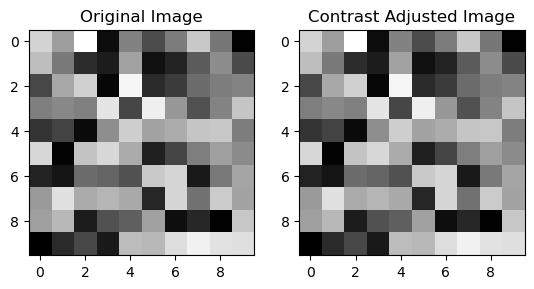

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def adjust_contrast(image, level):
    # Assuming image is scaled from 0 to 1
    mean = np.mean(image)
    return (image - mean) * level + mean

# Example usage with a synthetic image
test_image = np.random.rand(10, 10)  # Generate a random grayscale image
adjusted_image = adjust_contrast(test_image, 2.0)  # Increase contrast

# Plotting
fig, ax = plt.subplots(1, 2)
ax[0].imshow(test_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(adjusted_image, cmap='gray')
ax[1].set_title('Contrast Adjusted Image')
plt.show()


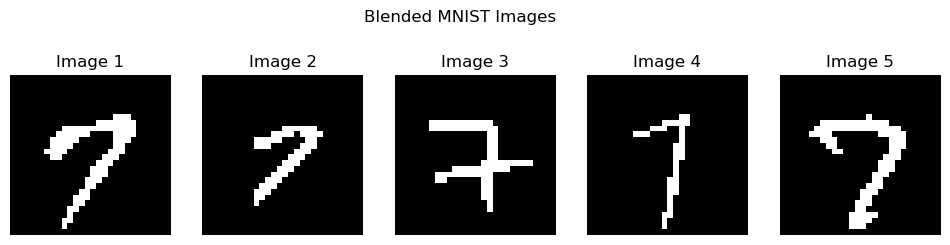

In [16]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from shading import create_blended_dataset

def load_mnist_data():
    """Load MNIST dataset with normalization."""
    transform = transforms.Compose([
        transforms.ToTensor(),  # Converts image to tensor.
        transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values.
    ])
    mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return mnist_data

def show_images(images, title):
    """Utility function to show images with matplotlib."""
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for idx, image in enumerate(images):
        axes[idx].imshow(image.squeeze(), cmap='gray', interpolation='none')
        axes[idx].set_title(f"Image {idx + 1}")
        axes[idx].axis('off')
    plt.suptitle(title)
    plt.show()

def main():
    # Parameters for blending
    digit1, digit2 = 2, 7
    contrast1, contrast2 = 0.5, 1.5  # Modify as needed
    proportion1, proportion2 = 0.6, 0.4
    n_images = 10

    # Load and create blended dataset
    mnist_data = load_mnist_data()
    blended_images = create_blended_dataset(digit1, digit2, contrast1, contrast2, proportion1, proportion2, n_images)

    # Display some of the blended images
    show_images(blended_images[:5], "Blended MNIST Images")

if __name__ == '__main__':
    main()


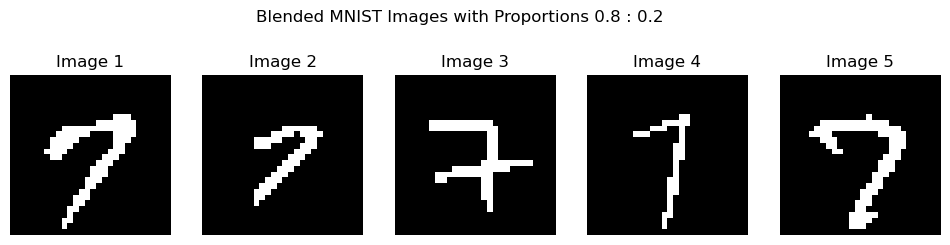

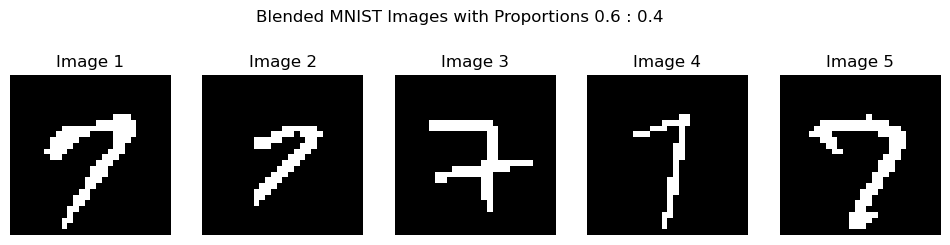

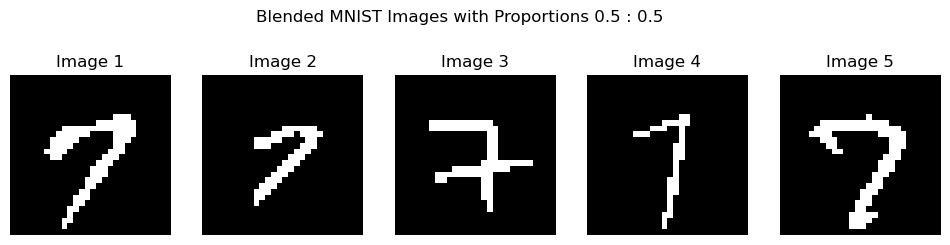

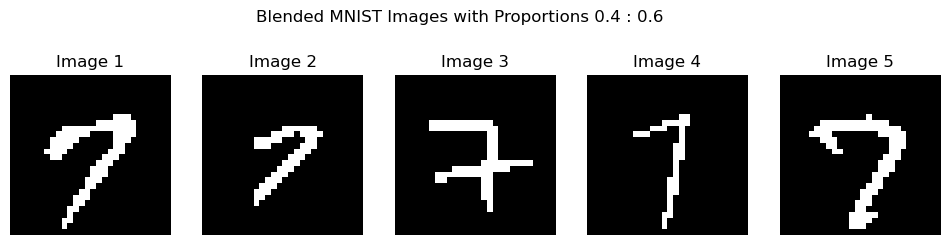

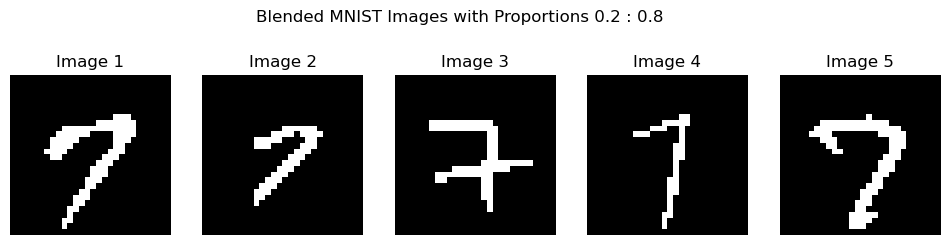

In [19]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from shading import create_blended_dataset

def load_mnist_data():
    """Load MNIST dataset with normalization."""
    transform = transforms.Compose([
        transforms.ToTensor(),  # Converts image to tensor.
        transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values.
    ])
    mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return mnist_data

def show_images(images, title):
    """Utility function to show images with matplotlib."""
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for idx, image in enumerate(images):
        axes[idx].imshow(image.squeeze(), cmap='gray', interpolation='none')
        axes[idx].set_title(f"Image {idx + 1}")
        axes[idx].axis('off')
    plt.suptitle(title)
    plt.show()

def main():
    # Parameters for blending
    digit1, digit2 = 2, 7
    contrast1, contrast2 = 0.5, 1.5  # Modify as needed
    proportion_sets = [(0.8, 0.2), (0.6, 0.4), (0.5, 0.5), (0.4, 0.6), (0.2, 0.8)]
    n_images = 5  # Number of images per proportion set

    # Load MNIST data
    mnist_data = load_mnist_data()

    for proportions in proportion_sets:
        proportion1, proportion2 = proportions
        # Create blended dataset
        blended_images = create_blended_dataset(digit1, digit2, contrast1, contrast2, proportion1, proportion2, n_images)
        # Display some of the blended images
        show_images(blended_images, f"Blended MNIST Images with Proportions {proportion1} : {proportion2}")

if __name__ == '__main__':
    main()


Selected 

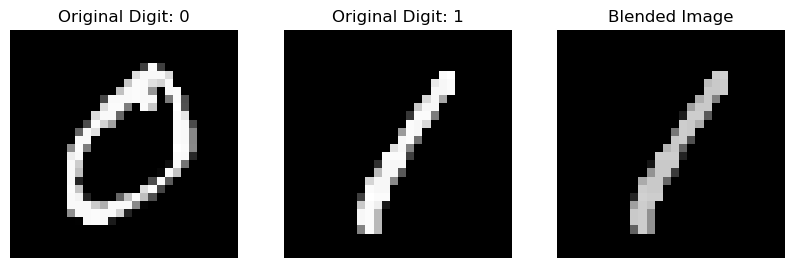

In [64]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Function to load MNIST data
def load_mnist_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values
    ])
    mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return mnist_data

# Function to extract images for a specific digit
def get_digit_images(data, digit, n_images):
    digit_images = [img for img, target in data if target == digit]
    return torch.stack(digit_images[:n_images])

# Function to apply contrast adjustment to a batch of images
def apply_contrast(images, contrast):
    """Applies contrast adjustment to a batch of images, ensuring contrast is between 0 and 1."""
    contrast = max(0, min(contrast, 1))
    images = images.float()  # Assume input is already normalized to [0, 1] or [-1, 1]
    mean_intensity = images.mean(dim=(2, 3), keepdim=True)
    adjusted_images = (images - mean_intensity) * contrast + mean_intensity
    adjusted_images = torch.clamp(adjusted_images, -1, 1)  # Clamping to [-1, 1] to stay within normalized range
    return adjusted_images

# Function to blend two sets of images by taking the maximum value for each pixel
def blend_images_max(image_set1, image_set2):
    return torch.max(image_set1, image_set2)

# Function to create and visualize blended dataset
def visualize_blended_images(data, digit1, digit2, contrast1, contrast2, n_images):
    images1 = get_digit_images(data, digit1, n_images)
    images2 = get_digit_images(data, digit2, n_images)
    
    images1_contrasted = apply_contrast(images1, contrast1)
    images2_contrasted = apply_contrast(images2, contrast2)
    
    blended_images = blend_images_max(images1_contrasted, images2_contrasted)
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    axes[0].imshow(images1[0][0], cmap='gray',vmax=1,vmin=0)
    axes[0].set_title('Original Digit: {}'.format(digit1))
    axes[0].axis('off')
    
    axes[1].imshow(images2[0][0], cmap='gray',vmax=1,vmin=0)
    axes[1].set_title('Original Digit: {}'.format(digit2))
    axes[1].axis('off')
    
    axes[2].imshow(blended_images[0][0], cmap='gray',vmax=1,vmin=0)
    axes[2].set_title('Blended Image')
    axes[2].axis('off')
    
    plt.show()

# Load MNIST data
mnist_data = load_mnist_data()

# Visualize blended images
visualize_blended_images(mnist_data, digit1=0, digit2=1, contrast1=0.1, contrast2=0.9, n_images=10)


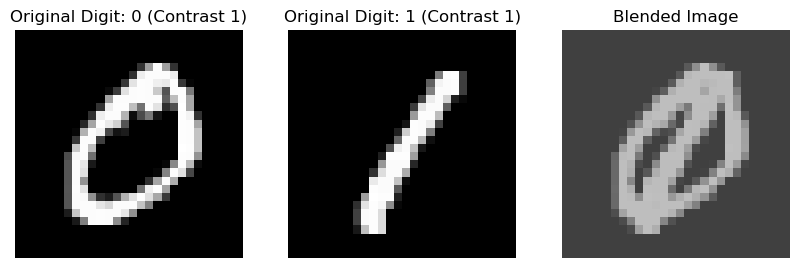

In [37]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Function to load MNIST data
def load_mnist_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values
    ])
    mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return mnist_data

# Function to extract images for a specific digit
def get_digit_images(data, digit, n_images):
    digit_images = [img for img, target in data if target == digit]
    return torch.stack(digit_images[:n_images])

# Function to apply contrast adjustment to a batch of images
def apply_contrast(images, contrast):
    """Applies contrast adjustment to a batch of images, ensuring contrast is between 0 and 1."""
    contrast = max(0, min(contrast, 1))
    images = images.float()  # Assume input is already normalized to [0, 1] or [-1, 1]
    mean_intensity = images.mean(dim=(2, 3), keepdim=True)
    adjusted_images = (images - mean_intensity) * contrast + mean_intensity
    adjusted_images = torch.clamp(adjusted_images, -1, 1)  # Clamping to [-1, 1] to stay within normalized range
    return adjusted_images


def apply_contrast_as_proportion(images, contrast):
    """Applies contrast as a proportion scaling factor to images."""
    return images * contrast

### New Blending Function
#This function blends the images using the contrast values as proportions:

def blend_images_max(image_set1, image_set2):
    return torch.max(image_set1, image_set2)

def blend_images_proportional(image_set1, image_set2, contrast1, contrast2):
    """Blends two sets of images based on contrast-defined proportions."""
    total_contrast = contrast1 + contrast2
    proportion1 = contrast1 / total_contrast
    proportion2 = contrast2 / total_contrast
    return torch.max(proportion1*image_set1, proportion2*image_set2)


### Visualizing Blended Images
#Update the visualizing function to handle these changes and show the results:


def visualize_blended_images(data, digit1, digit2, contrast1, contrast2, n_images):
    images1 = get_digit_images(data, digit1, n_images)
    images2 = get_digit_images(data, digit2, n_images)
    
    images1_scaled = apply_contrast_as_proportion(images1, contrast1)
    images2_scaled = apply_contrast_as_proportion(images2, contrast2)
    
    blended_images = blend_images_proportional(images1_scaled, images2_scaled, contrast1, contrast2)
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    axes[0].imshow(images1[0][0], cmap='gray', norm=plt.Normalize(-1, 1))
    axes[0].set_title(f'Original Digit: {digit1} (Contrast {contrast1})')
    axes[0].axis('off')
    
    axes[1].imshow(images2[0][0], cmap='gray', norm=plt.Normalize(-1, 1))
    axes[1].set_title(f'Original Digit: {digit2} (Contrast {contrast2})')
    axes[1].axis('off')
    
    axes[2].imshow(blended_images[0][0], cmap='gray', norm=plt.Normalize(-1, 1))
    axes[2].set_title('Blended Image')
    axes[2].axis('off')
    
    plt.show()


# Load MNIST data
mnist_data = load_mnist_data()

# Visualize blended images
visualize_blended_images(mnist_data, digit1=0, digit2=1, contrast1=1, contrast2=1, n_images=10)

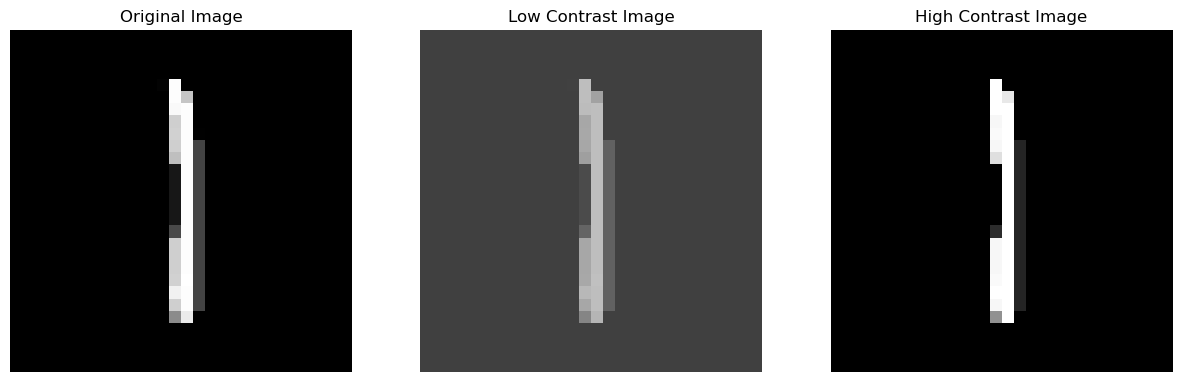

In [38]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Function to load MNIST data
def load_mnist_data():
    transform = transforms.Compose([
        transforms.ToTensor(),  # Converts image to tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values
    ])
    # Load training data
    mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return mnist_data

# Function to apply contrast adjustment
def apply_contrast(images, contrast_factor):
    """Applies contrast adjustment to a batch of images."""
    # Ensure the images are in the correct range [0, 1]
    images = images.clamp(0, 1)
    # Adjust contrast
    return 0.5 + (images - 0.5) * contrast_factor

# Function to visualize images
def visualize_images(images, title):
    fig, ax = plt.subplots(1, len(images), figsize=(15, 6))
    for i, img in enumerate(images):
        ax[i].imshow(img.squeeze(), cmap='gray', norm=plt.Normalize(0, 1))
        ax[i].set_title(f'{title[i]}')
        ax[i].axis('off')
    plt.show()

# Main execution block
if __name__ == '__main__':
    mnist_data = load_mnist_data()
    data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=10, shuffle=True)
    
    # Get one batch of data
    images, labels = next(iter(data_loader))
    
    # Original image
    original_image = images[0]
    
    # Adjust contrast
    low_contrast_image = apply_contrast(original_image, 0.5)  # Decreased contrast
    high_contrast_image = apply_contrast(original_image, 1.5)  # Increased contrast
    
    # Visualize the original and contrast-adjusted images
    visualize_images([original_image, low_contrast_image, high_contrast_image], 
                     ['Original Image', 'Low Contrast Image', 'High Contrast Image'])


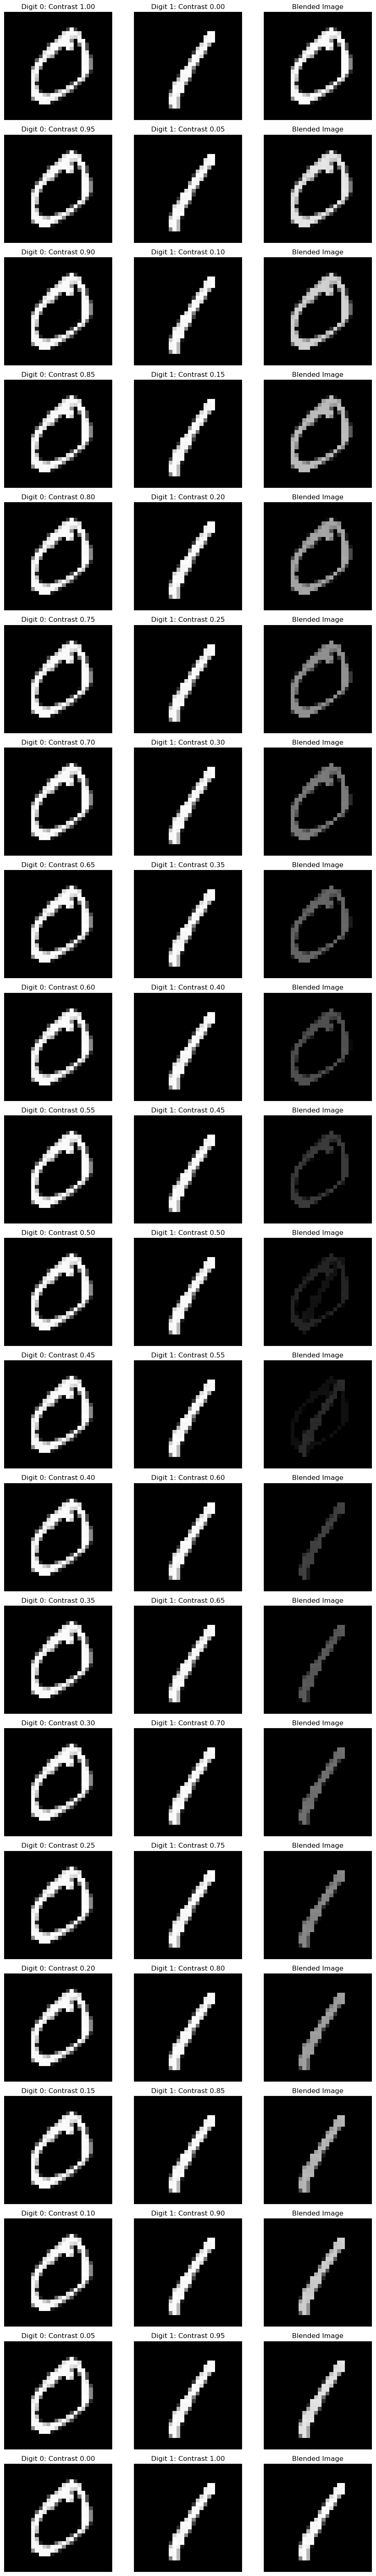

In [65]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Function to load MNIST data
def load_mnist_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values
    ])
    mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return mnist_data

# Function to extract images for a specific digit
def get_digit_images(data, digit, n_images):
    digit_images = [img for img, target in data if target == digit]
    return torch.stack(digit_images[:n_images])

# Function to apply contrast adjustment to a batch of images
def apply_contrast(images, contrast):
    """Applies contrast adjustment to a batch of images, ensuring contrast is between 0 and 1."""
    contrast = max(0, min(contrast, 1))
    images = images.float()  # Assume input is already normalized to [0, 1] or [-1, 1]
    mean_intensity = images.mean(dim=(2, 3), keepdim=True)
    adjusted_images = (images - mean_intensity) * contrast + mean_intensity
    adjusted_images = torch.clamp(adjusted_images, -1, 1)  # Clamping to [-1, 1] to stay within normalized range
    return adjusted_images

# Function to blend two sets of images by taking the maximum value for each pixel
def blend_images_max(image_set1, image_set2):
    return torch.max(image_set1, image_set2)

import matplotlib.pyplot as plt

# Function to create and visualize multiple blended images with varying contrasts
def visualize_contrast_series(data, digit1, digit2, start_contrast1, start_contrast2, shift, n_images, steps):
    fig, axes = plt.subplots(steps, 3, figsize=(10, steps * 3))  # Adjust subplot size based on the number of steps
    for i in range(steps):
        contrast1 = start_contrast1 - i * shift
        contrast2 = start_contrast2 + i * shift

        images1 = get_digit_images(data, digit1, n_images)
        images2 = get_digit_images(data, digit2, n_images)

        images1_contrasted = apply_contrast(images1, contrast1)
        images2_contrasted = apply_contrast(images2, contrast2)

        blended_images = blend_images_max(images1_contrasted, images2_contrasted)

        if steps > 1:
            ax1 = axes[i][0]
            ax2 = axes[i][1]
            ax3 = axes[i][2]
        else:
            ax1, ax2, ax3 = axes

        ax1.imshow(images1[0][0], cmap='gray', vmax=1, vmin=0)
        ax1.set_title('Digit {}: Contrast {:.2f}'.format(digit1, contrast1))
        ax1.axis('off')

        ax2.imshow(images2[0][0], cmap='gray', vmax=1, vmin=0)
        ax2.set_title('Digit {}: Contrast {:.2f}'.format(digit2, contrast2))
        ax2.axis('off')

        ax3.imshow(blended_images[0][0], cmap='gray', vmax=1, vmin=0)
        ax3.set_title('Blended Image')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
mnist_data = load_mnist_data()
visualize_contrast_series(mnist_data, digit1=0, digit2=1, start_contrast1=1.0, start_contrast2=0.0, shift=0.05, n_images=10, steps=21)


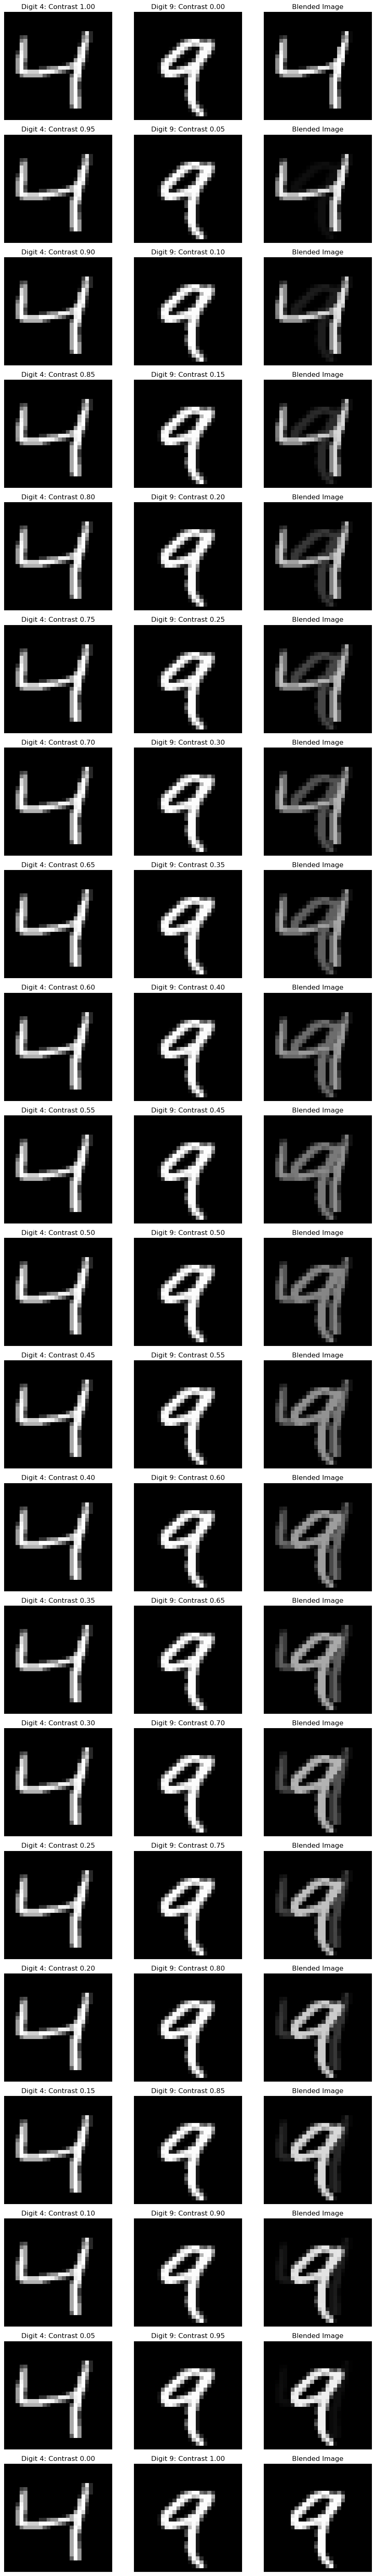

In [67]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Function to load MNIST data
def load_mnist_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values
    ])
    mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return mnist_data

# Function to extract images for a specific digit
def get_digit_images(data, digit, n_images):
    digit_images = [img for img, target in data if target == digit]
    return torch.stack(digit_images[:n_images])

# Function to apply contrast adjustment to a batch of images
def apply_contrast(images, contrast):
    """Applies contrast adjustment to a batch of images, ensuring contrast is between 0 and 1."""
    contrast = max(0, min(contrast, 1))
    images = images.float()  # Assume input is already normalized to [0, 1] or [-1, 1]
    mean_intensity = images.mean(dim=(2, 3), keepdim=True)
    adjusted_images = (images - mean_intensity) * contrast + mean_intensity
    adjusted_images = torch.clamp(adjusted_images, -1, 1)  # Clamping to [-1, 1] to stay within normalized range
    return adjusted_images

# Function to blend two sets of images by taking the maximum value for each pixel
def blend_images_max(image_set1, image_set2):
    return torch.max(image_set1, image_set2)

import matplotlib.pyplot as plt

# Function to create and visualize multiple blended images with varying contrasts
def visualize_contrast_series(data, digit1, digit2, start_contrast1, start_contrast2, shift, n_images, steps):
    fig, axes = plt.subplots(steps, 3, figsize=(10, steps * 3))  # Adjust subplot size based on the number of steps
    for i in range(steps):
        contrast1 = start_contrast1 - i * shift
        contrast2 = start_contrast2 + i * shift

        images1 = get_digit_images(data, digit1, n_images)
        images2 = get_digit_images(data, digit2, n_images)

        images1_contrasted = apply_contrast(images1, contrast1)
        images2_contrasted = apply_contrast(images2, contrast2)

        blended_images = blend_images_max(images1_contrasted, images2_contrasted)

        if steps > 1:
            ax1 = axes[i][0]
            ax2 = axes[i][1]
            ax3 = axes[i][2]
        else:
            ax1, ax2, ax3 = axes

        ax1.imshow(images1[0][0], cmap='gray', vmax=1)
        ax1.set_title('Digit {}: Contrast {:.2f}'.format(digit1, contrast1))
        ax1.axis('off')

        ax2.imshow(images2[0][0], cmap='gray', vmax=1)
        ax2.set_title('Digit {}: Contrast {:.2f}'.format(digit2, contrast2))
        ax2.axis('off')

        ax3.imshow(blended_images[0][0], cmap='gray', vmax=1)
        ax3.set_title('Blended Image')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
mnist_data = load_mnist_data()
visualize_contrast_series(mnist_data, digit1=4, digit2=9, start_contrast1=1.0, start_contrast2=0.0, shift=0.05, n_images=10, steps=21)